# Ex. 1

**Steps** : 

  1. Load train.csv and test.csv containing a 2D dataset (features X and Y) with two different classes

  2. Visualize the dataset and normalize the dimensions of the samples to have zero mean and unit standard deviation

  3. Implement an MLP using Numpy in order to solve a classification problem trying to estimate the classes of the samples

  4. Train the MLP and visualize the decision boundary in 2D of the classification. Plot the training loss for each iteration.

  5. Use the learned MLP to estimate the classes of the data in test.csv. Compute the accuracy in training and testing dataset.

## Sol. 1

### Load data

In [1]:
import pandas as pd 
import numpy as np

data_path = 'Data/'
results_path = 'Results/'

# Load training and testing data
train_data = pd.read_csv(data_path + "train.csv")
test_data = pd.read_csv(data_path + "test.csv")

X_train = train_data[["X", "Y"]].to_numpy(dtype=np.double)
C_train = train_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

X_test = test_data[["X", "Y"]].to_numpy(dtype=np.double)
C_test = test_data["C"].to_numpy(dtype=np.int32).reshape(-1, 1)

### Visualise data

Text(0, 0.5, 'y')

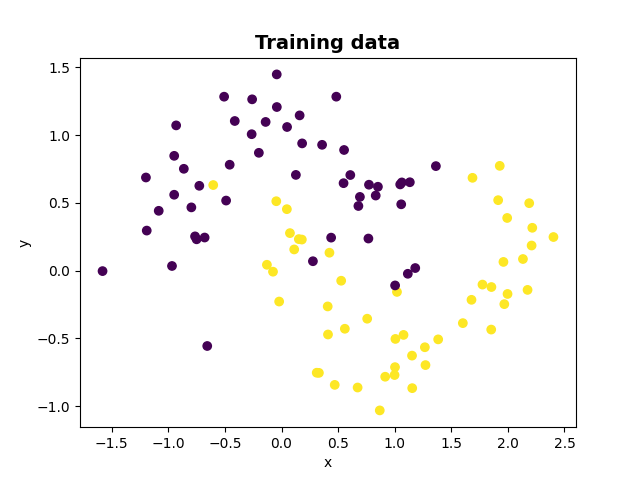

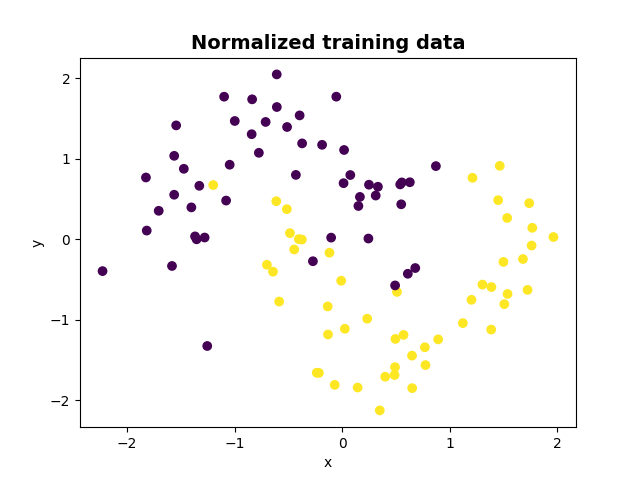

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt #  matplotlib for visualization

# Visualize original data
fig1 = plt.figure()
plt.title("Training data", fontsize=14, fontweight="bold")
plt.scatter(X_train[:,0], X_train[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

# Normalize dataset
mu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0)
X_train_norm = (X_train - mu) / sigma

# Visualize normalized data
fig2 = plt.figure()
plt.title("Normalized training data", fontsize=14, fontweight="bold")
plt.scatter(X_train_norm[:,0], X_train_norm[:,1], c=C_train)
plt.xlabel("x")
plt.ylabel("y")

### Implement MLP using numpy

In [3]:
class MLP(object):
    def __init__(self,inputNode=2,hiddenNode = 3, outputNode=1):        
        #Define MLP hyper-parameters
        self.inputLayerSize = inputNode # number of input dimensions (x)
        self.outputLayerSize = outputNode # number of output dimensions (y)
        self.hiddenLayerSize = hiddenNode # Dimension of intermediate layer (W_2)
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Compute inputs from outputs
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    # Derivative of sigmoid and loss with respect their inputs
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def loss(self, yHat, y):
        # Compute loss for given X,y, use weights already stored in class.
        # J = 0.5*sum((y-yHat)**2) # FIXME: MSE loss has to be replaced by CrossEntropy
        H = np.multiply(-y, np.log(yHat)) - np.multiply((1-y), np.log(1-yHat))
        J = 1/y.size * np.sum(H) # CrossEntropy
        return J

    def lossPrime(self, yHat, y):
        # Compute the derivative of the loss for given yHat, y
        # dJdyHat = -(y - yHat) # FIXME: MSE loss has to be replaced by CrossEntropy
        dJdyHat = np.divide(-y, yHat) + np.divide(1-y, 1-yHat)
        return dJdyHat
        
    # Derivative of parameters
    def backward(self,X, yHat, y):
        self.yHat = yHat
        
        delta3 = np.multiply(self.lossPrime(yHat, y), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        return dJdW1,dJdW2

### Train MLP and visualise decision boundary

In [4]:
def train(NN,X, y,epoch = 10000,lr = .1):
    list_loss = []
    
    for i in range(epoch):
        #Compute derivative with respect to W and W2 for a given X and y:
        yHat = NN.forward(X)
        
        gradW1,gradW2 = NN.backward(X,yHat,y)
        #now update the weight using gradient descent
        NN.W1 -= gradW1 * lr 
        NN.W2 -= gradW2 * lr
        
        if i%100 == 0 : 
            loss = NN.loss(yHat,y)
            print('Loss {}={}'.format(i,loss))
            list_loss.append(loss)
        
    return list_loss


NN = MLP(hiddenNode=20)
#Train network with the data:
list_loss = train(NN, X_train_norm, C_train, epoch=10000, lr=0.01)

Loss 0=0.9057565257307865
Loss 100=0.31544623709509595
Loss 200=0.27317259823190715
Loss 300=0.22527189182475282
Loss 400=0.19039504518910047
Loss 500=0.16963876458424423
Loss 600=0.15736021770849146
Loss 700=0.14967449200599298
Loss 800=0.14455936624518242
Loss 900=0.14096419107410346
Loss 1000=0.13831334702941817
Loss 1100=0.13627320335844606
Loss 1200=0.1346404607826626
Loss 1300=0.13328569658518513
Loss 1400=0.1321232825376852
Loss 1500=0.13109462733281466
Loss 1600=0.13015848084811404
Loss 1700=0.1292851249035854
Loss 1800=0.12845277771906682
Loss 1900=0.12764530998032853
Loss 2000=0.12685077402138595
Loss 2100=0.12606045823206855
Loss 2200=0.12526828811469456
Loss 2300=0.12447045309756204
Loss 2400=0.1236651702177029
Loss 2500=0.12285251495224525
Loss 2600=0.12203426222973882
Loss 2700=0.1212136910175513
Loss 2800=0.12039531745043963
Loss 2900=0.11958453762974629
Loss 3000=0.11878718396164682
Loss 3100=0.11800902673133551
Loss 3200=0.11725527906162421
Loss 3300=0.1165301780659035

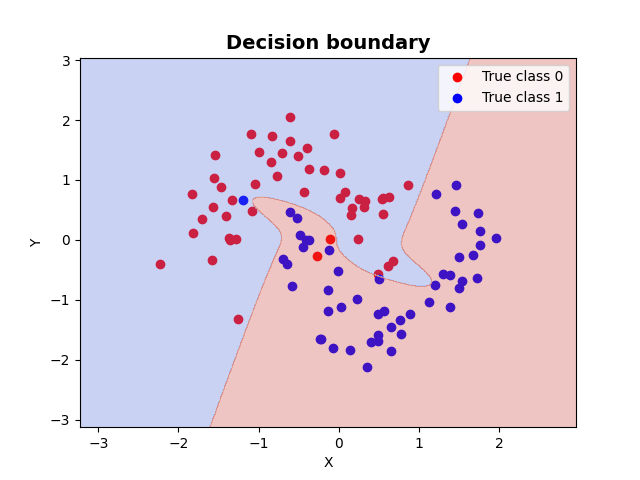

In [5]:
def classify(NN, X):
    yHat = NN.forward(X)
    return yHat.round().astype(int)

# Plot the training data as a scatter plot (for reference)
fig3 = plt.figure()
class_0_points = X_train_norm[C_train[:,0] == 0]
class_1_points = X_train_norm[C_train[:,0] == 1]
plt.scatter(class_0_points[:, 0], class_0_points[:, 1], color='red', label='True class 0')
plt.scatter(class_1_points[:, 0], class_1_points[:, 1], color='blue', label='True class 1')

# Plot the decision boundary # FIXME: Is there a cleaner way of doing this?
x_min, x_max = X_train_norm[:, 0].min() - 1, X_train_norm[:, 0].max() + 1
y_min, y_max = X_train_norm[:, 1].min() - 1, X_train_norm[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = classify(NN, grid_points)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision boundary', fontsize=14, fontweight="bold")
plt.legend()

(0.0, 0.9462360537336815)

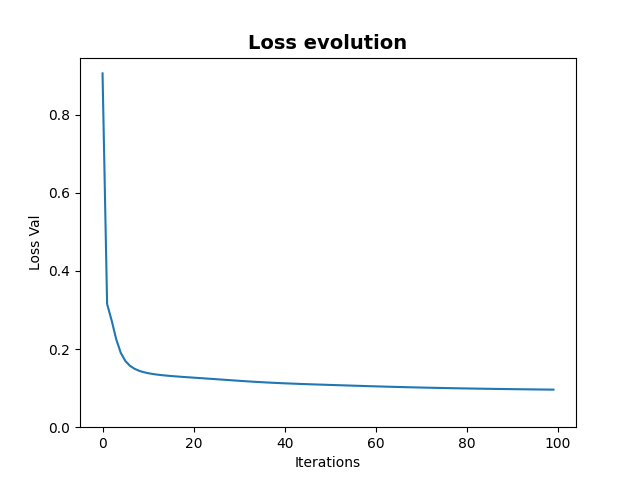

In [6]:
%matplotlib widget

# Visualize loss function iterations
fig4 = plt.figure()
plt.title('Loss evolution', fontsize=14, fontweight="bold")
plt.plot(list_loss)
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.ylim(0, None)

### Classify the data in test.csv using the trained MLP

In [7]:
output = classify(NN, X_train_norm)

# TODO: Create a scatter plot with 4 different types of points:
#   - True class 0, predicted class 0
#   - True class 0, predicted class 1
#   - True class 1, predicted class 0
#   - True class 1, predicted class 1


# Ex. 2

Instead of using the implemented optimizer with standard Gradient Descent, in this exercice you will use SGD with momentum. 
This optimizer tipically accelerates the convergence of the optimization and, thus, it reduce the number of iterations during gradient-descent.

**Steps** : 

  1. Try to understand how momentum is implemented reading carefully https://ruder.io/optimizing-gradient-descent/index.html#momentum, or https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d

  2. Modifying OptimSGD in the examples, implement SGD with momentum in a new class call OptimMom. 

  3. Train the MLP implmented in numpy with this new optimizer. 

  4. Use different values for the momentum paramter `[0,1]` and plot the evolution of the training loss during gradient-descent. Compare the results using the different values and standard gradient descent.

## Sol. 2

# Ex. 3

**Steps** : 

  1. Do the same as Ex. 1 but implementing the `MLP` using `PyTorch`.

  2. Train different vesions of the `MLP` by varying the number of hidden neurons and learing rates

  3. Analyse the results in each case and discuss them.

> HINT: Check in https://pytorch.org/docs/stable/nn.html what loss function implemented in `PyTorch` you have to use in this case.

## Sol. 3